# Fig. S7: Correlate Ca2+ and MEA clusters

# imports

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pickle5
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import interpolate

# load datasets

In [2]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'

with open(file_path+'MEA_dataset/MEA_dataset.pkl', 'rb') as handle:
    mea_dataset = pickle5.load(handle)
    
# G32 calcium traces
with open(file_path+'ADD_YOUR_PATH_TO_DATA_HERE/G32_subcluster_calcium_chirp.pkl','rb') as f:
     calcium_traces = pickle5.load(f)

# --------------------------------------------------------------------------------------------------------------------

## pseudo-Ca2+

In [3]:
datatset_normalization_ca = 'Ca_Norm'

In [4]:
ca_num_cells_cluster_i = len(mea_dataset[datatset_normalization_ca][0])
ca_num_cells_cluster_ii = len(mea_dataset[datatset_normalization_ca][1])
ca_num_cells_cluster_iii = len(mea_dataset[datatset_normalization_ca][5])

In [5]:
ca_cluster_i_traces_ctrl = np.zeros((ca_num_cells_cluster_i,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))
ca_cluster_ii_traces_ctrl = np.zeros((ca_num_cells_cluster_ii,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))
ca_cluster_iii_traces_ctrl = np.zeros((ca_num_cells_cluster_iii,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))

ca_cluster_i_traces_no = np.zeros((ca_num_cells_cluster_i,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))
ca_cluster_ii_traces_no = np.zeros((ca_num_cells_cluster_ii,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))
ca_cluster_iii_traces_no = np.zeros((ca_num_cells_cluster_iii,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))

ca_cluster_i_traces_wo = np.zeros((ca_num_cells_cluster_i,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))
ca_cluster_ii_traces_wo = np.zeros((ca_num_cells_cluster_ii,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))
ca_cluster_iii_traces_wo = np.zeros((ca_num_cells_cluster_iii,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))

In [6]:
ca_cluster_mean_ctrl = np.zeros((3,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))
ca_cluster_std_ctrl = np.zeros((3,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))

ca_cluster_mean_no = np.zeros((3,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))
ca_cluster_std_no = np.zeros((3,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))

ca_cluster_mean_wo = np.zeros((3,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))
ca_cluster_std_wo = np.zeros((3,mea_dataset[datatset_normalization_ca][0][0][0].shape[0]))

In [7]:
for i in range(ca_num_cells_cluster_i):
    ca_cluster_i_traces_ctrl[i,:] = mea_dataset[datatset_normalization_ca][0][i][0]
    ca_cluster_i_traces_no[i,:] = mea_dataset[datatset_normalization_ca][0][i][1]
    ca_cluster_i_traces_wo[i,:] = mea_dataset[datatset_normalization_ca][0][i][2]

for i in range(ca_num_cells_cluster_ii):
    ca_cluster_ii_traces_ctrl[i,:] = mea_dataset[datatset_normalization_ca][1][i][0]
    ca_cluster_ii_traces_no[i,:] = mea_dataset[datatset_normalization_ca][1][i][1]
    ca_cluster_ii_traces_wo[i,:] = mea_dataset[datatset_normalization_ca][1][i][2]
    
for i in range(ca_num_cells_cluster_iii):
    ca_cluster_iii_traces_ctrl[i,:] = mea_dataset[datatset_normalization_ca][5][i][0]
    ca_cluster_iii_traces_no[i,:] = mea_dataset[datatset_normalization_ca][5][i][1]
    ca_cluster_iii_traces_wo[i,:] = mea_dataset[datatset_normalization_ca][5][i][2]

## downsample pseudo-calcium traces

In [8]:
mea_traces = np.zeros((3,800))

mea_traces[0,:] = np.mean(ca_cluster_i_traces_ctrl,axis=0)
mea_traces[1,:] = np.mean(ca_cluster_ii_traces_ctrl,axis=0)
mea_traces[2,:] = np.mean(ca_cluster_iii_traces_ctrl,axis=0)

In [10]:
new_frames = np.linspace(0, 1, 249)
original_frames = np.linspace(0, 1, 800)
interpolator = interpolate.interp1d(original_frames, mea_traces, kind='linear')
downsampled_values = interpolator(new_frames)

# upsample calcium traces

In [12]:
def upsample_trace(trace, original_frames=249, target_frames=800):
    original_indices = np.linspace(0, 1, original_frames)
    target_indices = np.linspace(0, 1, target_frames)
    return np.interp(target_indices, original_indices, trace)

In [13]:
# Apply the upsample function to each calcium and MEA trace
calcium_trace1_upsampled = upsample_trace(calcium_traces[0,:])
calcium_trace2_upsampled = upsample_trace(calcium_traces[1,:])
calcium_trace3_upsampled = upsample_trace(calcium_traces[2,:])

In [14]:
mea_traces = np.zeros((3,800))
mea_traces[0,:] = np.mean(ca_cluster_i_traces_ctrl,axis=0)
mea_traces[1,:] = np.mean(ca_cluster_ii_traces_ctrl,axis=0)
mea_traces[2,:] = np.mean(ca_cluster_iii_traces_ctrl,axis=0)

In [15]:
calcium_data  = pd.DataFrame({
    'Ca2+ Cluster 1': calcium_trace1_upsampled,
    'Ca2+ Cluster 2': calcium_trace2_upsampled,
    'Ca2+ Cluster 3': calcium_trace3_upsampled,
})    
    
mea_data  = pd.DataFrame({    
    'MEA Cluster i': mea_traces[0,:],
    'MEA Cluster ii': mea_traces[1,:],
    'MEA Cluster iii': mea_traces[2,:]
})

# --------------------------------------------------------------------------------------------------------------------

# plotting

<AxesSubplot:>

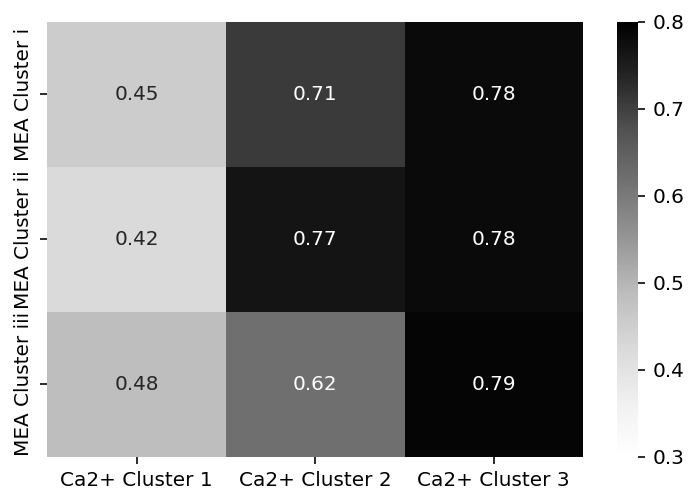

In [16]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
correlation_matrix = pd.DataFrame(index=mea_data.columns, columns=calcium_data.columns)
# Calculate the pairwise correlations between each MEA and Calcium trace
for mea_col in mea_data.columns:
    for calcium_col in calcium_data.columns:
        correlation_matrix.loc[mea_col, calcium_col] = mea_data[mea_col].corr(calcium_data[calcium_col])
# Convert the values to numeric (they might be stored as objects)
correlation_matrix = correlation_matrix.astype(float)
sns.heatmap(correlation_matrix, annot=True, cmap='Greys', cbar=True,vmin=0.3,vmax=0.8,ax=ax)

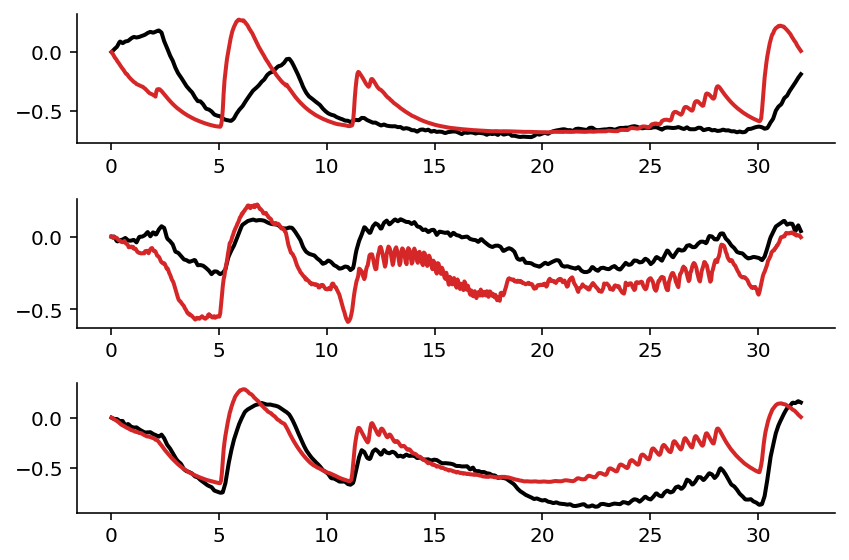

In [17]:
color_calcium = 'k'
color_mea = 'tab:red'
lw=2
xaxis = np.linspace(0,32,calcium_trace1_upsampled.shape[0])

fig, ax = plt.subplots(3,1,figsize=(6,4))

ax[0].plot(xaxis,calcium_trace1_upsampled-calcium_trace1_upsampled[0],color=color_calcium,lw=lw)
ax[0].plot(xaxis,mea_traces[2,:]-mea_traces[2,0],color=color_mea,lw=lw)
ax[1].plot(xaxis,calcium_trace2_upsampled-calcium_trace2_upsampled[0],color=color_calcium,lw=lw)
ax[1].plot(xaxis,mea_traces[1,:]-mea_traces[1,0],color=color_mea,lw=lw)
ax[2].plot(xaxis,calcium_trace3_upsampled-calcium_trace3_upsampled[0],color=color_calcium,lw=lw)
ax[2].plot(xaxis,mea_traces[0,:]-mea_traces[0,0],color=color_mea,lw=lw)

sns.despine()
fig.tight_layout()